In [1]:
import matplotlib.pyplot as plt

import skimage.io
from skimage.filters import threshold_mean
from skimage.color import rgb2gray

imname = 'Slice_4_40X_Top_of_Brain.tif'
img = skimage.io.imread(imname)

img_gray = img[:, :, 0]

thresh = threshold_mean(img_gray)
binary = img_gray > thresh

import matplotlib.pyplot as plt

plt.imshow(binary, cmap='gray')
plt.show()

<Figure size 640x480 with 1 Axes>

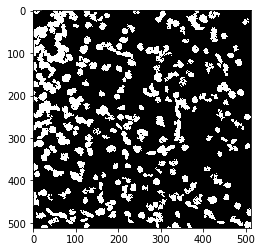

In [2]:
from skimage.morphology import remove_small_objects

clim = remove_small_objects(binary, min_size=100)
plt.imshow(clim, cmap='gray')
plt.show()

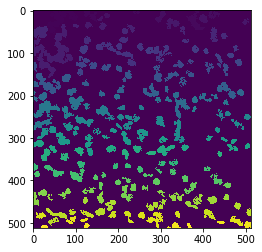

In [3]:
lbim = skimage.measure.label(clim) #clean image that is labeled with each object being a different number

plt.imshow(lbim)
plt.show()

In [4]:
lbim

array([[  1,   1,   1, ...,   0,   0,   0],
       [  1,   1,   1, ...,   0,   0,   0],
       [  1,   1,   1, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0, 180, 180],
       [  0,   0,   0, ...,   0, 180, 180],
       [  0,   0,   0, ..., 180, 180, 180]], dtype=int64)

In [5]:
import numpy as np
import math as m

props = skimage.measure.regionprops(lbim)

numobj = lbim.max()

objects = np.zeros((numobj, 6)) #rows, columns

i = 0 
while i < numobj:
    objects[i,0] = (i + 1)
    objects[i,1] = props[i].centroid[0] #x-coordinate
    objects[i,2] = props[i].centroid[1] #y-coordinate
    objects[i,3] = props[i].area
    objects[i,4] = props[i].perimeter  
    objects[i,5] = ((props[i].perimeter)**2)/(4*m.pi*props[i].area)
    i = i + 1

In [6]:
objects

array([[1.00000000e+00, 3.15873016e+00, 8.78571429e+00, 1.26000000e+02,
        6.32487373e+01, 2.52652332e+00],
       [2.00000000e+00, 2.06696589e+01, 6.45451825e+01, 1.67100000e+03,
        3.99646753e+02, 7.60617413e+00],
       [3.00000000e+00, 1.14238876e+01, 1.34805621e+02, 4.27000000e+02,
        1.69675144e+02, 5.36535812e+00],
       ...,
       [1.82000000e+02, 5.05929825e+02, 1.25236842e+02, 1.14000000e+02,
        3.92132034e+01, 1.07337118e+00],
       [1.83000000e+02, 5.06078431e+02, 3.66205882e+02, 1.02000000e+02,
        4.19705627e+01, 1.37429368e+00],
       [1.84000000e+02, 5.07972477e+02, 2.66697248e+01, 1.09000000e+02,
        4.05208153e+01, 1.19872617e+00]])

In [22]:
import numpy as np

i = 0 

threshold = 2.5

while i < numobj:
    if objects[i,5] > threshold:
        objects = np.delete(objects, (i), axis=0)
    numobj = objects.shape[0]
    i = i + 1

TypeError: '<' not supported between instances of 'int' and 'tuple'

In [18]:
numobj

151

In [19]:
objects.shape

(109, 6)

In [14]:
objects

array([[1.00000000e+00, 3.15873016e+00, 8.78571429e+00, 1.26000000e+02,
        6.32487373e+01, 2.52652332e+00],
       [2.00000000e+00, 2.06696589e+01, 6.45451825e+01, 1.67100000e+03,
        3.99646753e+02, 7.60617413e+00],
       [3.00000000e+00, 1.14238876e+01, 1.34805621e+02, 4.27000000e+02,
        1.69675144e+02, 5.36535812e+00],
       ...,
       [1.82000000e+02, 5.05929825e+02, 1.25236842e+02, 1.14000000e+02,
        3.92132034e+01, 1.07337118e+00],
       [1.83000000e+02, 5.06078431e+02, 3.66205882e+02, 1.02000000e+02,
        4.19705627e+01, 1.37429368e+00],
       [1.84000000e+02, 5.07972477e+02, 2.66697248e+01, 1.09000000e+02,
        4.05208153e+01, 1.19872617e+00]])

In [12]:
np.delete(objects, (1), axis=0)

array([[  1.        ,   3.15873016,   8.78571429, 126.        ,
         63.24873734,   2.52652332],
       [  3.        ,  11.42388759, 134.80562061, 427.        ,
        169.67514421,   5.36535812],
       [  4.        ,   3.91869919, 243.17886179, 123.        ,
         62.6629509 ,   2.54042694],
       ...,
       [182.        , 505.92982456, 125.23684211, 114.        ,
         39.21320344,   1.07337118],
       [183.        , 506.07843137, 366.20588235, 102.        ,
         41.97056275,   1.37429368],
       [184.        , 507.97247706,  26.66972477, 109.        ,
         40.52081528,   1.19872617]])